<a href="https://colab.research.google.com/github/harkpun/EDA-interview-selection-round/blob/main/EDA_on_Netflix_Data_(company%3DASBL%2C_position%3Ddata_analyst_intern).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Description**
Netflix is one of the most popular media and video streaming platforms. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

## **Task**
As a Data Analyst, you need to analyse the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries. The dataset provided to you consists of a list of all the TV shows/movies available on Netflix. Here are the attributes or features of the dataset.

#### **The following is a list of tasks that I need to complete and have completed.**
1. Load the dataset in your environment.
2. Perform EDA (exploratory data analysis) on the dataset.
3. Plot some meaningful graphs here which convey some insights and those insights businesses can use to further increase their revenue and attract more customers. Make sure that the insights found must be backed up by data and share some recommendations for the stakeholders (The recommendations should be simpler to understand as mostly stakeholders or businesspeople want things to be non-technical so that they are easy to grasp. Do not use much technical jargon and explain in simpler words).
4. Find answers to the below questions from this dataset.
(Questions which are marked as OPTIONAL if answered will add more marks to your final scoring metrics)
    - Which are the top 5 directors who produce most of the movies only?

    - Which are the top 5 genres which are liked by people or here liking means listed on the portal of Netflix (you can find a count for each genre and list the top 5 genres) for movies and TV shows?

    - Which 2 directors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years? [OPTIONAL]

    - Which are the top 10 actors who are liked by people and have the most content on the Netflix OTT platform.

    - Which 2 actors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years? [OPTIONAL]

Link of Dataset : https://docs.google.com/spreadsheets/d/1jbuuY1UhH4FCH6-PMjmrEZt5QY_13wj_/edit?usp=sharing&ouid=106020338081215860295&rtpof=true&sd=true


## **1. Understnading Dataset**

In [ ]:
# importing necessary libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# mounting notebook on google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing dataset
netflix_df = pd.read_excel('/content/drive/MyDrive/DS projects/ASBL - Data Analyst Intern - Assignment/asbl_data_analyst_interview_assignment_netflix.xlsx')

In [ ]:
# top 5 rows
netflix_df.head()

,Type,Title,Director,Cast,Country,Release_year,Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
# last 5 rows
netflix_df.tail()

,Type,Title,Director,Cast,Country,Release_year,Genres
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2018,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,"Comedies, Horror Movies"
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,"Children & Family Movies, Comedies"
8806,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,"Dramas, International Movies, Music & Musicals"


####**Size Of Dataset**

In [ ]:
# size of dataset
print(f'number of rows : {netflix_df.shape[0]}  \nnumber of columns : {netflix_df.shape[1]}')

number of rows : 8807  
number of columns : 7


#### **Dataset Information**

In [ ]:
# dataset information
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          8807 non-null   object
 1   Title         8807 non-null   object
 2   Director      6173 non-null   object
 3   Cast          7982 non-null   object
 4   Country       7976 non-null   object
 5   Release_year  8807 non-null   int64 
 6   Genres        8807 non-null   object
dtypes: int64(1), object(6)
memory usage: 481.8+ KB


- There is NaN/Missing values present in dataset
- Most of the dataset contain object data.



#### **Checking Missing Values**

In [ ]:
# counting number of misiing values present in dataset
netflix_df.isnull().sum()

Type               0
Title              0
Director        2634
Cast             825
Country          831
Release_year       0
Genres             0
dtype: int64

Missing values present in thes columns
* 2634 in 'Director'
* 825 in 'Cast'
* 831 in 'Country'

<AxesSubplot:>

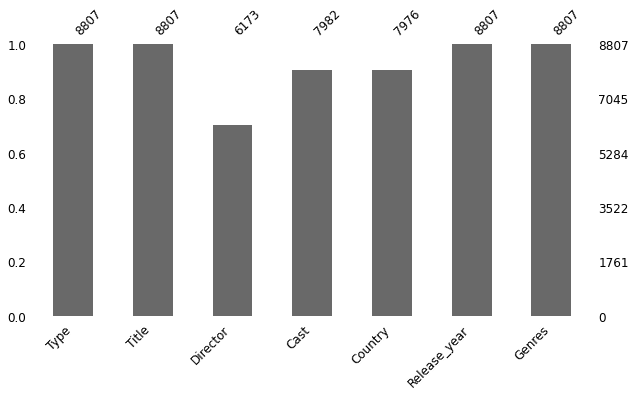

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(netflix_df, figsize=(10,5), fontsize=12)

<AxesSubplot:>

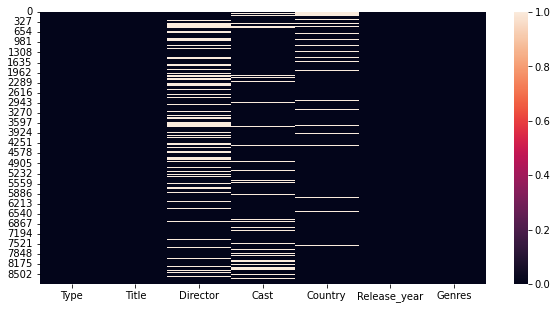

In [ ]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(netflix_df.isna())

- NaN values present in the Director, Cast, Country column.

- All the data that we have is related to each specific movie. So, we can't impute any null values with using any method. Also we don't want to loose any data since the data size is small for that reason we simply impute nan values with empty string in below procedure after analyzing each columns.

## **2. Understanding Attributes**

### **Attributes Information**

**Type**: Whether the content is a Movie or TV Show

**Title**: Title of the Movie / TV Show

**Director**: Director of the Movie. There can be multiple directors also.

**Cast**: Actors involved in the movie/show

**Country**: The country where the movie/show was produced

**Release_year**: Actual Release year of the movie or tv show

**Genres**: Genre or Genres of the content (there can be multiple genres as well say the movie Avengers is Sci-Fi but it is Action and Adventure too)

In [ ]:
# attaributes name
netflix_df.columns

Index(['Type', 'Title', 'Director', 'Cast', 'Country', 'Release_year',
       'Genres'],
      dtype='object')

In [ ]:
# statistical summary
netflix_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
Genres,8807,514,"Dramas, International Movies",362,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# counting unique value present in each attributes
netflix_df.nunique()

Type               2
Title           8807
Director        4528
Cast            7692
Country          748
Release_year      74
Genres           514
dtype: int64

## **3. Exploratery Data Analysis**
Exploratory Data Analysis (EDA) is the very first step before you can perform any changes to the dataset or develop a statistical model to answer business problems. In other words, the process of EDA contains summarizing, visualizing and getting deeply acquainted with the important traits of a data set.

### **3.1 Type column**

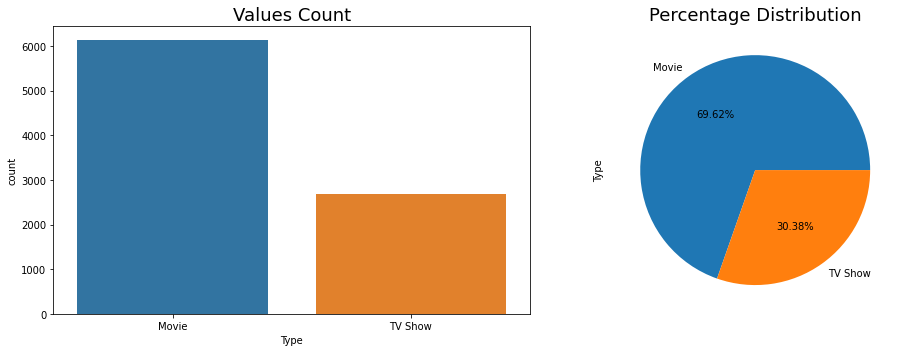

In [ ]:
# Create a figure with two subplots
fig,ax = plt.subplots(1,2, figsize=(14,5))

# plot coutplot for content types
graph = sns.countplot(x=netflix_df['Type'], ax=ax[0])
graph.set_title('Values Count', size=18)

# plot piechart for content types
netflix_df['Type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1])
plt.title('Percentage Distribution', size=18)

plt.tight_layout()
plt.show()


**Inferences:**
- Based on the insights that most people prefer movies over TV shows due to time commitment, and that the majority of Netflix subscribers are in the 18-30 age group who are working professionals, businesses,
- Netflix should focus on offering more movie options to Netflix subscribers in order to increase customer retention.

### **3.2 Title column**

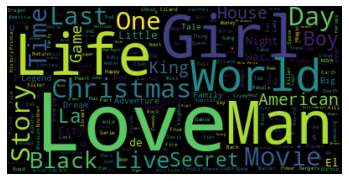

In [ ]:
# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# text documents
text = " ".join(word for word in netflix_df['Title'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Inferences:**
- Based on the observation that words like "Love," "Life," "Man," "Girl," "Story," and "World" appear frequently in the movie title column, Netflix can consider using these popular words to potentially create more appealing and attention-grabbing titles for their movies.
- Utilizing popular words and phrases can help attract viewers and make it easier for them to find content that is relevant to their interests.

### **3.3 Director column**


In [ ]:
# splitting Director in "Director" column by comma
top_director = netflix_df['Director'].str.split(', ').explode().dropna()

# top director over past year
top_director.value_counts()

Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: Director, Length: 4993, dtype: int64

In [ ]:
print(f'number of unique classes : {netflix_df.Director.nunique()}')
print(f'counting null value : {netflix_df.Director.isna().sum()}')

number of unique classes : 4528
counting null value : 2634


In [ ]:
# counting number of Movies directed by director
Movie_count = netflix_df[netflix_df['Type']=='Movie']['Director'].value_counts()
print(f'Movie directed by director : {Movie_count.sum()}')

# counting number of TV Shows directed by director
TVshow_count = netflix_df[netflix_df['Type']=='TV Show']['Director'].value_counts()
print(f'TV show directed by director : {TVshow_count.sum()}')

Movie directed by director : 5943
TV show directed by director : 230


Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Name: Director, dtype: int64

- There are many missing values present in the "Director" column of the TV show dataset

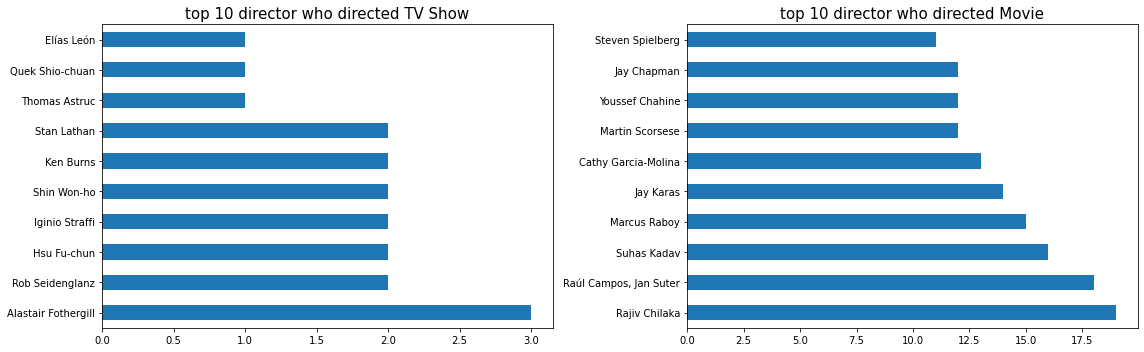

In [ ]:
# Create a figure with two subplots
fig,ax = plt.subplots(1,2, figsize=(16,5))

# top 10 director who directed movie
movie = Movie_count[:10].plot(kind='barh', ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=15)

# top 10 director who directed TV show
show = TVshow_count[:10].plot(kind='barh', ax=ax[0])
show.set_title('top 10 director who directed TV Show', size=15)

plt.tight_layout()
plt.show()

**Inferences :**
- Based on the insights that Alastair Fothergrill, Rob Seidenglanz, and Rajiv Chikala directed the most shows in the dataset and Rajiv Chikala, Raul Campose and Jan Suter directed the most movies, it is suggested that the Netflix production team consider hiring these directors for future projects.
- These directors have proven to be successful in their respective fields, and their knowledge can potentially contribute to the success of future projects.



### **3.4 Cast column**

In [ ]:
# splitting cast in "Cast" column by comma
cast = netflix_df['Cast'].str.split(', ').explode().dropna()

# top ten cast name who play highest role in movie/show.
cast.value_counts()[:10]

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: Cast, dtype: int64

In [ ]:
# top actor who played most in TV Shows
top_TVshows_actor = netflix_df[netflix_df['Type']=='TV Show']['Cast'].str.split(', ').explode().dropna().value_counts()

# top actor who played most in Movies
top_Movie_actor = netflix_df[netflix_df['Type']=='Movie']['Cast'].str.split(', ').explode().dropna().value_counts()

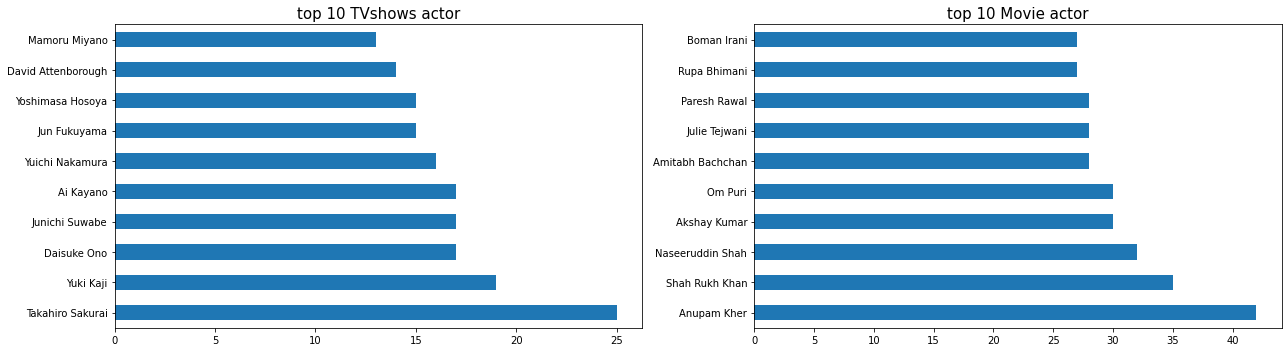

In [ ]:
# Create a figure with two subplots
fig,ax = plt.subplots(1,2, figsize=(18,5))

# plotting actor who played highest number of TV Show
a = top_TVshows_actor.head(10).plot(kind='barh', ax=ax[0])
a.set_title('top 10 TVshows actor', size=15)

# plotting actor who played highest number of Movie
b = top_Movie_actor.head(10).plot(kind='barh', ax=ax[1])
b.set_title('top 10 Movie actor', size=15)

plt.tight_layout()
plt.show()

**Inferences :**
- Based on the observation that Takahiro Sakurai, Yuki Kaji, and Daisuke Ono played the highest number of roles in TV shows, Netflix can consider featuring these popular voice actors in their anime and animation content to potentially attract viewers who are fans of their work.
- Anupam Kher, Shahrukh Khan, and Naseeruddin Shah played the highest number of roles in movies, Netflix can collaborate with these popular actors in upcoming Indian film productions, or showcase their past works to target audiences who appreciate their performances.
- Overall, using the popularity of these actors can potentially boost the viewership and success of Netflix's content.

### **3.5 Country column**

In [ ]:
# splitting country in "Coutry" column by comma
country = netflix_df['Country'].str.split(', ').explode().dropna().value_counts()
country

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: Country, Length: 127, dtype: int64

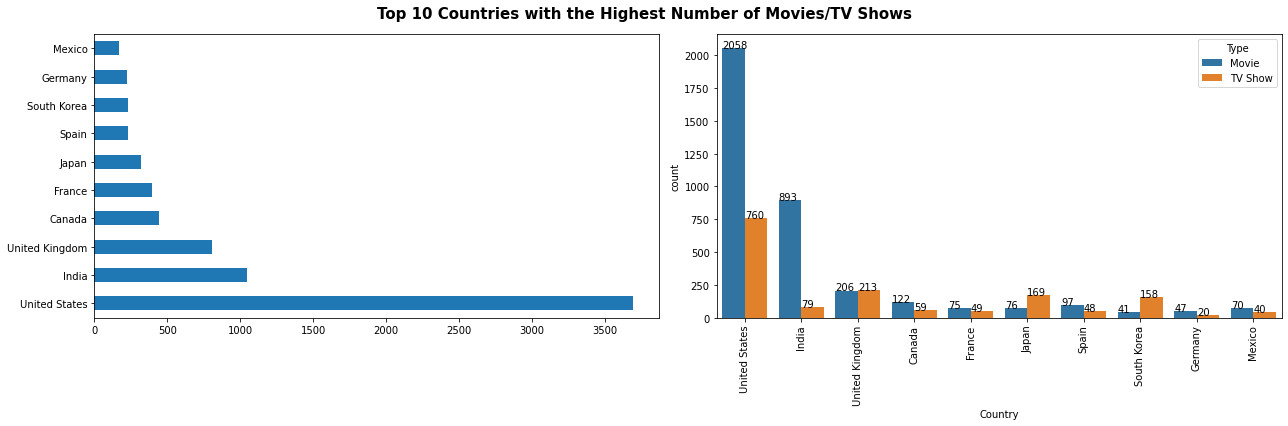

In [ ]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
plt.suptitle('Top 10 Countries with the Highest Number of Movies/TV Shows', weight='bold', size=15)

# Plot the top 10 countries with the highest number of movies/shows
country.nlargest(10).plot(kind='barh', ax=ax[0])

# Plot the number of movies and shows for each of the top 10 countries
graph = sns.countplot(x="Country", data=netflix_df, hue='Type', order=country.index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


**Inferences :**
- To satisfy viewers' interests, Netflix should continue to invest in creating content from popular regions such as the United States, India, and the United Kingdom.
- Netflix may consider investing in film production in order to meet the preferences of viewers in India and the United States.
- In terms of TV shows, Netflix can focus on acquiring more productions from popular regions such as South Korea and Japan, as well as investing in original content in these genres.
- Overall, focusing on creating content from popular regions and genres can potentially attract more viewers and increase the success of Netflix's productions.

In [ ]:
# % share of movies / tv shows by top 10 countries
netflix_df['Country'].value_counts().nlargest(5).sum()/len(netflix_df)*100

52.832973770864086

- The top 3 countries together account for about 52% of all movies and TV shows in the dataset.

### **3.6 Release_year column**

In [ ]:
print(f'oldest record of movie/show release year : {netflix_df.Release_year.min()}')
print(f'latest record of movie/show release yesr : {netflix_df.Release_year.max()}')

oldest record of movie/show release year : 1925
latest record of movie/show release yesr : 2021


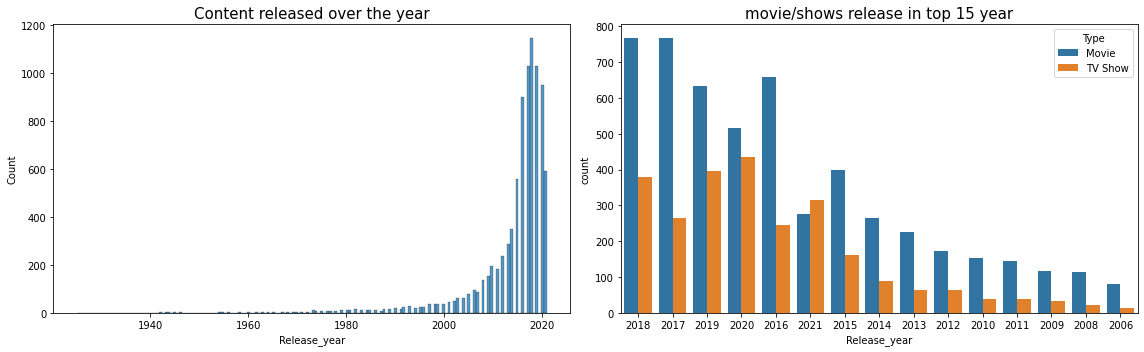

In [ ]:
# Create a figure with two subplots
fig,ax = plt.subplots(1,2, figsize=(16,5))

# data distibution
hist = sns.histplot(netflix_df['Release_year'], ax=ax[0])
hist.set_title('Content released over the year', size=15)

# top 15 country who released highest number of Movie and TV show
count = sns.countplot(x="Release_year", hue='Type', data=netflix_df, order=netflix_df['Release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('movie/shows release in top 15 year', size=15)

plt.tight_layout()
plt.show()

**Inferences :**
- Netflix has a higher number of new movies and TV shows compared to older ones, indicating a continuous effort to provide fresh content to its viewers.
- The period between 2015-2020 had the highest number of releases on Netflix, with the highest count in 2018, indicating a focus on providing a diverse range of content to viewers during this time.
- These observations indicate that Netflix gives importance to offering new and innovative content to its audience, addressing diverse interests and preferences.

### **3.7 Geners columns**

In [ ]:
# spliiting genre from "Genres" column.
genres = netflix_df['Genres'].str.split(', ').explode().dropna().value_counts().reset_index().rename({'index':'Genres', 'Genres':'Count'}, axis=1)

# top ten genres present in dataset
genres[:10]

,Genres,Count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


In [ ]:
# counting number of Genres
print(f'number of Genres present in dataset : {len(genres)}')

number of Genres present in dataset : 42


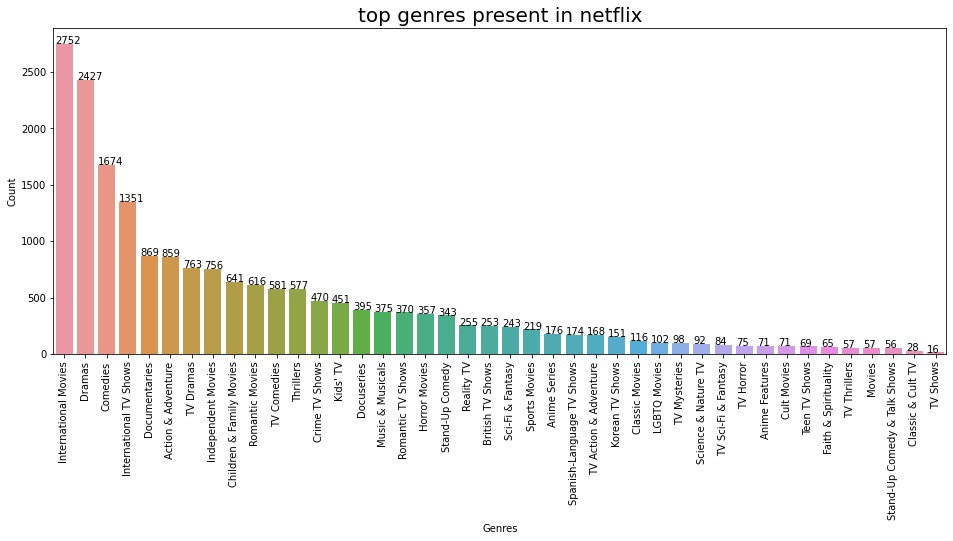

In [ ]:
# plotting graph to display top genres
plt.figure(figsize=(16,6))
graph = sns.barplot(x='Genres', y='Count', data=genres)
graph.set_title('top genres present in netflix', size=20)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.show()

**Inferences :**
- International movies, dramas, and comedies have the highest number of genres, Netflix should consider investing more in this categro to meet their audience viewing preferences.
- Providing a diverse range of content will help Netflix attract and retain viewers from different cultural backgrounds and interests.
- On the other hand, because classic and cult TV, TV thriller, stand-up comedy, and talk shows have the fewest number of genres present in dataset, Netflix may reconsider their strategy for these genres.

### **CLoser Analysis**

#####**increment of TV show year on year**

In [ ]:
# number of TV show released on Netflix each year
shows_added_year_wise = netflix_df[netflix_df['Type']=="TV Show"].groupby(['Release_year']).agg({'Title':'count'})
shows_added_year_wise.reset_index(inplace=True)
shows_added_year_wise

,Release_year,Title
0,1925,1
1,1945,1
2,1946,1
3,1963,1
4,1967,1
5,1972,1
6,1974,1
7,1977,1
8,1979,1
9,1981,1


##### **plot for TV show added over years**

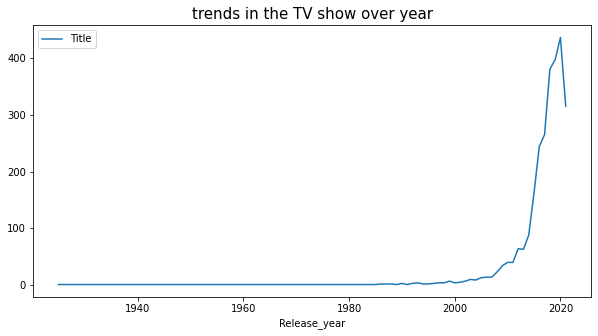

In [ ]:
# plot graph
shows_added_year_wise.plot.line(x="Release_year", y="Title", figsize=(10,5))
plt.title('trends in the TV show over year', size=15)
plt.show()

**Inferences :**
- Considering the trend of increasing numbers of TV shows on Netflix since 2000, it would be advantageous for the company to continue prioritizing the production of high-quality TV content to increase their revenue.

#### **increment of Movie year on year**

In [ ]:
# number of movies released on Netflix each year
movies_added_year_wise = netflix_df[netflix_df['Type']=="Movie"].groupby(['Release_year']).agg({'Title':'count'})
movies_added_year_wise.reset_index(inplace=True)
movies_added_year_wise

,Release_year,Title
0,1942,2
1,1943,3
2,1944,3
3,1945,3
4,1946,1
...,...,...
68,2017,767
69,2018,767
70,2019,633
71,2020,517


#### **plot for movies added over years**

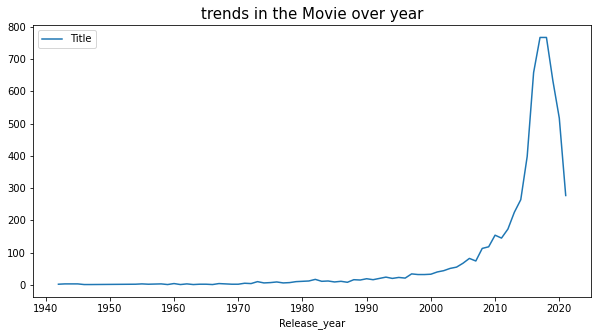

In [ ]:
movies_added_year_wise.plot.line(x="Release_year", y="Title", figsize=(10,5))
plt.title('trends in the Movie over year', size=15)
plt.show()

**Inferences:**
- Based on insight, Although the number of movies on Netflix has increased year over year since 2000, the rate of growth has slowed in recent years. The increase in the number of movies available on the platform between 2015 and 2021 has not been as significant as in previous years.

###**Hypothesis: In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

### **TV SHOWS**

***TV Shows added till 2010***


In [ ]:
TVshows_till_2010 = shows_added_year_wise[(shows_added_year_wise['Release_year'] <= 2010)]['Title'].sum()
TVshows_till_2010

222

***TV shows added in between 2011 to 2018***

In [ ]:
TVshows_between_2011to2018 = shows_added_year_wise[(shows_added_year_wise['Release_year'] <= 2018) & (shows_added_year_wise['Release_year'] >= 2011)]["Title"].sum()
TVshows_between_2011to2018

1306

In [ ]:
print(f'Number of TV shows increased by : {TVshows_between_2011to2018 / TVshows_till_2010} times in between 2011-2018 as compared to up to 2010')

Number of TV shows increased by : 5.882882882882883 times in between 2011-2018 as compared to up to 2010


**Inferences:**

*According to the given dataset, the number of TV shows have definitely increased by more than 3 times.*
- This suggests that there has been a significant increase in the number of TV shows being released in recent years, which could be due to various factors such as the rise of streaming platforms and the expansion of the global TV market.
- Netflix should continue to adapt to changing consumer preferences and behavior, such as the growing trend of binge-watching and the increasing use of mobile devices to watch TV shows.


### **Movies**

***Movies added upto 2010***


In [ ]:
Movies_till_2010 = movies_added_year_wise[(movies_added_year_wise['Release_year'] <= 2010)]['Title'].sum()
Movies_till_2010

1307

***TV shows added in between 2011 to 2018***

In [ ]:
Movies_between_2011to2018 = movies_added_year_wise[(movies_added_year_wise['Release_year'] <= 2018) & (movies_added_year_wise['Release_year'] >= 2011)]["Title"].sum()
Movies_between_2011to2018

3397

In [ ]:
print(f'Number of Movies increased by : {Movies_between_2011to2018 / Movies_between_2011to2018} times in between 2011-2018 as compared to up to 2010')

Number of Movies increased by : 1.0 times in between 2011-2018 as compared to up to 2010


**Inferences :**
- Based on that the number of movies being added to Netflix has not increased as much as TV shows, Netflix should consider increasing the number of movies in their library to appeal to a wider range of viewers.
- Additionally, they could consider releasing more movies on a regular basis to keep viewers engaged and satisfied with the content available on the platform.

## **4. Data Cleaning**
Once the EDA is complete, data cleaning can be performed to modify or transform the data to fit specific requirements for analysis or modeling. The cleaning process may involve handling missing, removing duplicates, transforming data types, and more, depending on the specific needs of the analysis.

#### **Duplicat values**

In [ ]:
# duplicate values
netflix_df.duplicated().sum()

0

- There is no duplicate entries in the dataset.

#### **Handling Missing Values**

<AxesSubplot:>

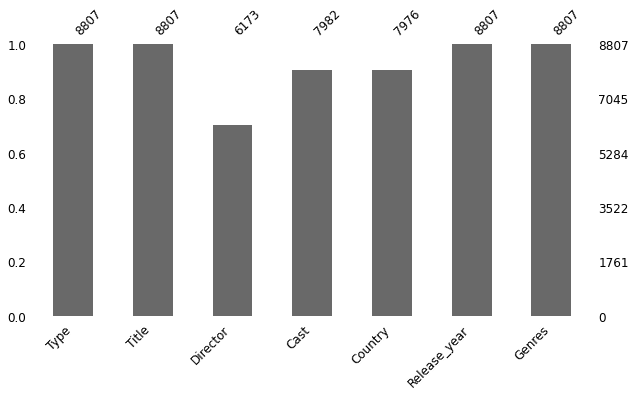

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(netflix_df, figsize=(10,5), fontsize=12)

In [ ]:
# Missing Values Percentage
round(netflix_df.isna().sum()/len(netflix_df)*100, 2)

Type             0.00
Title            0.00
Director        29.91
Cast             9.37
Country          9.44
Release_year     0.00
Genres           0.00
dtype: float64

- Replacing missing values with 'empty string' for the director, cast, and country attributes
- Percentage of missing values is high. Since, data size is too small and important details are specific to each movie we cant simply drop those rows, this approach ensures that no data is lost while also maintaining the integrity of the data.

In [ ]:
# missing value imputation with "empty string"
netflix_df[['Director','Cast','Country']] = netflix_df[['Director','Cast','Country']].fillna(' ')

In [ ]:
# checking for null values after treating them.
netflix_df.isna().sum()

Type            0
Title           0
Director        0
Cast            0
Country         0
Release_year    0
Genres          0
dtype: int64

#### **Handling Outliers**

<AxesSubplot:>

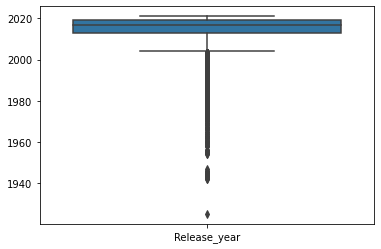

In [ ]:
# boxplot for outlier detection
sns.boxplot(data=netflix_df)

In [ ]:
print(f'latest_year present in dataset : {netflix_df.Release_year.max()} \nOldest year present in dataset : {netflix_df.Release_year.min()}')

latest_year present in dataset : 2021 
Oldest year present in dataset : 1925


- Since, the almost all of the data present in textual format except release year.
- The data that we need to create cluster or building model are present in textual foramat. So, there is no need to perform handling outlier.
-If the project requirement need to use "Release_year" column in that case we simply use Capping method to hadling outlier.

In [ ]:
netflix_df.sample(10)

,Type,Title,Director,Cast,Country,Release_year,Genres
5002,Movie,Natalia Valdebenito: El especial,"Raúl Campos, Jan Suter",Natalia Valdebenito,Chile,2018,Stand-Up Comedy
7021,Movie,Hulk Vs.,"Sam Liu, Frank Paur","Fred Tatasciore, Matthew Wolf, Graham McTavish...",United States,2009,"Action & Adventure, Sci-Fi & Fantasy"
3012,TV Show,Nailed It! Germany,,"Angelina Kirsch, Bernd Siefert",Germany,2020,"International TV Shows, Reality TV"
1479,TV Show,SanPa: Sins of the Savior,Cosima Spender,,Italy,2020,"Crime TV Shows, Docuseries, International TV S..."
5056,Movie,Jerry Seinfeld: I'm Telling You for the Last Time,Marty Callner,Jerry Seinfeld,United States,1998,Stand-Up Comedy
3364,Movie,The Road to El Camino: Behind the Scenes of El...,,,United States,2019,"Documentaries, International Movies"
3571,TV Show,Hyperdrive,,"Rutledge Wood, Mike Hill, Michael Bisping, Lin...",United States,2019,Reality TV
5630,Movie,Take the 10,Chester Tam,"Josh Peck, Tony Revolori, Kevin Corrigan, Ches...",United States,2017,Comedies
2810,Movie,Bypass Road,Naman Nitin Mukesh,"Neil Nitin Mukesh, Adah Sharma, Rajit Kapoor, ...",India,2019,"International Movies, Thrillers"
6930,TV Show,Harold Shipman - Driven to Kill,,Harold Shipman,United Kingdom,2014,"British TV Shows, Crime TV Shows, Docuseries"


**After performing exploratory data analysis and data cleaning, the Netflix dataset is now ready for building models such as clustering or recommendation systems. These models can be developed based on the attributes and features of the dataset that are relevant to the specific business problem.**

## **5. Conclusion**
- Netflix has a diverse range of content, including a mix of movies and TV shows from various genres, regions, and languages. This variety of content can attract viewers with different preferences and interests.

- The highest number of productions are based out of the United States, India, and the United Kingdom. Netflix can consider investing in creating more content from these regions to cater to viewers' interests.

- Viewership trends suggest that most people prefer watching movies over TV shows, especially in the age group of 18-30 who are busy with their work. Netflix can consider offering more movie options to cater to these customer preferences.

- The most common words in movie titles are "love," "life," "man," "girl," "story," and "world." These words reflect the common themes and topics explored in movies and can provide insight into viewer interests.

- Voice actors like Takahiro Sakurai, Yuki Kaji, and Daisuke Ono are popular in TV shows, while actors like Anupam Kher, Shahrukh Khan, and Naseeruddin Shah are popular in movies. Netflix can leverage the popularity of these actors by featuring them in their content or working with them in future productions to potentially attract viewers who are fans of their work.

Overall, Netflix can continue to focus on creating diverse and engaging content from popular regions and genres to attract more viewers and increase the success of their productions.






```
a.  Which are the top 5 directors who produce most of the movies only?
-->     Rajiv Chilaka             19  
        Raúl Campos, Jan Suter    18
        Suhas Kadav               16
        Marcus Raboy              15
        Jay Karas                 14

b.  Which are the top 5 genres which are liked by people or here liking means listed on the portal of Netflix (you can find a count for each genre and list the top 5 genres) for movies and TV shows?
-->     International Movies	      2752
        Dramas	                    2427
        Comedies	                  1674
        International TV Shows	    1351
        Documentaries	              869

c.  Which 2 directors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years? [OPTIONAL]
-->     Rajiv Chilaka       22
        Jan Suter           21

d. Which are the top 10 actors who are liked by people and have the most content on the Netflix OTT platform.
-->     Anupam Kher         43
        Shah Rukh Khan      35
        Julie Tejwani       33
        Naseeruddin Shah    32
        Takahiro Sakurai    32
        Rupa Bhimani        31
        Akshay Kumar        30
        Om Puri             30
        Yuki Kaji           29
        Paresh Rawal        28

e.  Which 2 actors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years? [OPTIONAL]
-->     Anupam Kher         43
        Shah Rukh Khan      35
```

